# 1 pracownia fizyczna - ćwiczenie 9


In [2]:
from IPython.display import display, Math
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# długość drutu [m]
wire_len = [
    # first person
    0.945,
    0.951,
    0.950,
    0.950,
    0.949,
    # second person
    0.949,
    0.950,
    0.948,
    0.949,
    0.949,
]

# błąd pomiaru średnicy drutu i grubości wskazówki[mm]
zero_ind_err = -0.04

# średnica drutu [mm] (pomiar surowy)
wire_d = [0.77, 0.77, 0.77, 0.77, 0.77]

# grubość wskazówki [mm] (pomiar surowy)
needle_d = [0.58, 0.57, 0.58, 0.58, 0.58]

# korekta błędu pomiaru średnicy drutu i grubości wskazówki [mm]
wire_d = np.array(wire_d) - zero_ind_err
needle_d = np.array(needle_d) - zero_ind_err

print("Po korekcie:")
print("d:", wire_d)
print("d_w:", needle_d)

# obciążenia dodatkowe [kg]
wire_weights = [1, 2, 3, 4, 5, 6, 6.5, 6.5, 6, 5, 4, 3, 2, 1]

# wydłużenie drutu dla obciążeń dodatkowych [l. podziałek]
wire_len_diff_1 = [1, 2, 4, 5, 8, 11, 13, 13, 11, 9, 7, 6, 5, 4]
wire_len_diff_2 = [1, 2, 5, 7, 8, 9, 10, 10, 9, 8, 7, 5, 4, 3]

Po korekcie:
d: [0.81 0.81 0.81 0.81 0.81]
d_w: [0.62 0.61 0.62 0.62 0.62]


## Szerokość podziałki mikroskopu


In [4]:
# szerokość wskazówki [l. podziałek]
d_w = 10

# szerokość podziałki mikroskopu [mm]
needle_d_avg = np.mean(needle_d)
d_m = needle_d_avg / d_w

print("d_m:", d_m)

d_m: 0.06180000000000001


## Wydłużenie drutu $\Delta l$


In [5]:
# wydłużenie drutu w [mm]
wire_len_diff_1_mm = np.array(wire_len_diff_1) * d_m
wire_len_diff_2_mm = np.array(wire_len_diff_2) * d_m

print("Delta l 1:", wire_len_diff_1_mm)
print("Delta l 2:", wire_len_diff_2_mm)

Delta l 1: [0.0618 0.1236 0.2472 0.309  0.4944 0.6798 0.8034 0.8034 0.6798 0.5562
 0.4326 0.3708 0.309  0.2472]
Delta l 2: [0.0618 0.1236 0.309  0.4326 0.4944 0.5562 0.618  0.618  0.5562 0.4944
 0.4326 0.309  0.2472 0.1854]


## Regresja liniowa


In [6]:
l_filtered = wire_len_diff_2_mm[7:]

In [18]:
from sklearn.linear_model import LinearRegression


m = np.array(wire_weights[7:]).reshape(-1, 1)
l = np.array(l_filtered)

print(m.reshape(-1))
print(l)

model = LinearRegression()
model.fit(m, l)

wire_len_pred = model.predict(m)

a = model.coef_[0]
b = model.intercept_


display(Math(f"a = {a:.4f}"))
display(Math(f"b = {b:.4f}"))
display(Math(f"R^2 = {model.score(m, l):.4f}"))

[6.5 6.  5.  4.  3.  2.  1. ]
[0.618  0.5562 0.4944 0.4326 0.309  0.2472 0.1854]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
print(wire_len_pred)

[0.6095966  0.57003059 0.49089858 0.41176657 0.33263456 0.25350255
 0.17437054]


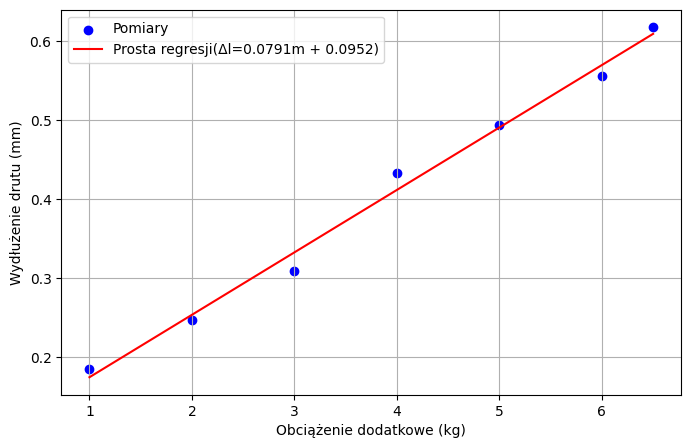

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(m, l, label="Pomiary", color="blue")
plt.plot(
    m,
    wire_len_pred,
    label=f"Prosta regresji(Δl={model.coef_[0]:.4f}m + {model.intercept_:.4f})",
    color="red",
)
plt.xlabel("Obciążenie dodatkowe (kg)")

plt.ylabel("Wydłużenie drutu (mm)")
plt.legend()
plt.grid()
plt.show()

## Średnie wartości:


In [10]:
wire_len_avg = np.mean(wire_len)
wire_d_avg = np.mean(wire_d)
needle_d_avg = np.mean(needle_d)

In [11]:
display(Math(r"\bar{l} = " + str(wire_len_avg)))
display(Math(r"\bar{d} = " + str(wire_d_avg)))
display(Math(r"\bar{d_w} = " + str(needle_d_avg)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Moduł Younga

$$
E = \frac{4g\bar{l}}{\pi\bar{d}^2 \beta_1}
$$


In [26]:
# przeliczenie na metry
wire_d_avg_m = wire_d_avg / 1000
beta_1_m = a / 1000
E = (4 * 9.81 * wire_len_avg) / (np.pi * wire_d_avg_m**2 * beta_1_m)

print("E = ", E)

E =  228309033824.95844


Wartość bliska 180 GPa, co jest wartością charakterystyczną dla stali.


## Niepewności pomiarowe


### Niepewności pomiarowe średnich


$$
u_c(x) = \sqrt{u_A^2(x) + u_B^2(x)}
$$

$$
u_A(x) = \sqrt{\frac{1}{N-1} \sum_{i=1}^{N} (x_i - \bar{x})^2}
$$

$$
u_B(x) = \frac{\Delta x}{\sqrt{3}}
$$


In [31]:
# długość drutu
# uA(l)
uA_l = np.std(wire_len, ddof=1)

uB_l = 0.01 / np.sqrt(3)
u_l = np.sqrt(uA_l**2 + uB_l**2)

# średnica drutu
# wyniki nie wykazują rozrzutu, więc liczymy niepewność typu B
uB_d = 0.001 / np.sqrt(3)
u_d = uB_d

# grubość wskazówki
uA_dw = np.std(needle_d, ddof=1)
uB_dw = 0.001 / np.sqrt(3)
u_dw = np.sqrt(uA_dw**2 + uB_dw**2)

print("Pośrednie wyniki:")
display(Math(r"u_B(l) = " + str(uB_l)))
display(Math(r"u_A(l) = " + str(uA_l)))

print("końcowe wyniki:")
display(Math(r"u(l) = " + str(u_l)))
display(Math(r"u(d_w) = " + str(u_dw)))
display(Math(r"u(d) = " + str(u_d)))

Pośrednie wyniki:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

końcowe wyniki:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Niepewność standardowa współczynników regresji


In [32]:
# Obliczanie niepewności dla współczynników
n = len(m)
y_pred = model.predict(m)
s_y = np.sqrt(np.sum((l - y_pred) ** 2) / (n - 2))

# Obliczanie niepewności standardowych dla a i b
u_a = s_y * np.sqrt(n / (n * np.sum(m**2) - np.sum(m) ** 2))
u_b = s_y * np.sqrt(np.sum(m**2) / (n * np.sum(m**2) - np.sum(m) ** 2))

display(Math(r"u_a = " + f"{u_a:.6f}"))
display(Math(r"u_b = " + f"{u_b:.6f}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Niepewność standardowa modułu Younga

$$
u_c(E) = \frac{4g}{\pi \bar{d}^2 a}
\sqrt{ u^2(l) + \left( \frac{2\bar{l}}{\bar{d}} \right)^2 u^2(d) + \left( \frac{\bar{l}}{a} \right)^2 u^2(a) }.
$$


In [15]:
def calculate_u_E():
    g = 9.81

    d_m = wire_d_avg * 10**-3
    u_d_m = u_d * 10**-3

    u_a_m = u_a * 10**-3
    a_m = a * 10**-3

    u_E = (
        (4 * g)
        / (np.pi * d_m**2 * a_m)
        * np.sqrt(
            u_l**2
            + (2 * wire_len_avg / d_m) ** 2 * u_d_m**2
            + (wire_len_avg / a_m) ** 2 * u_a_m**2
        )
    )

    return u_E


u_E = calculate_u_E()
display(Math(r"u(E) = " + str(u_E)))

<IPython.core.display.Math object>

## Niepewność standardowa szerokości podziałki mikroskopu

Wzór na szerokość podziałki mikroskopu:

$$
d_m = \frac{d_w}{N}
$$

Niepewność złożona:

#

$$
u_c(d_m) = \sqrt{\sum_{k=1}^{K} \left( \frac{\partial d_m}{\partial x_k} \right)^2 u^2(x_k)}
$$

$$
= \sqrt{\left(\frac{\partial d_m}{\partial d_w}\right)^2 u^2(d_w) + \left(\frac{\partial d_m}{\partial N}\right)^2 u^2(N)}
$$

$$
= \sqrt{\left(\frac{1}{N}\right)^2 u^2(d_w) + \left(0\right)^2 u^2(N)}
$$

$$
= \frac{u(d_w)}{N}
$$


In [18]:
N = 10
u_c_dm = u_dw / N

display(Math(r"u(d_m) = " + str(u_c_dm)))

<IPython.core.display.Math object>

## Niepewność standardowa wydłużenia drutu w podziałkach

Niepewność standardowa typu B:

$$
u_B(n) = \frac{1}{\sqrt{3}}
$$


In [30]:
u_n = 1 / np.sqrt(3)

display(Math(r"u(n) = " + str(u_n)))

<IPython.core.display.Math object>

In [35]:
print(d_m)

0.0008100000000000002


In [34]:
u_dl = u_n * d_m

display(Math(r"u(n) = " + str(u_dl)))

<IPython.core.display.Math object>

## Niepewność standardowa wydłużenia drutu

$$
    u_c(\Delta l) = \sqrt{\left(d_m\right)^2 u^2(n) + \left(n\right)^2 u^2(d_m)}
$$


In [32]:
print(u_n)

0.5773502691896258


In [41]:
u_c_dl_1 = [np.sqrt(d_m**2 * u_n**2 + n**2 * u_c_dm**2) for n in wire_len_diff_1]

u_c_dl_2 = [np.sqrt(d_m**2 * u_n**2 + n**2 * u_c_dm**2) for n in wire_len_diff_2]

print(u_c_dl_1)
print(u_c_dl_2)

[np.float64(0.035683095904550294), np.float64(0.03569164234569956), np.float64(0.03572580766523458), np.float64(0.035751410228595654), np.float64(0.03586214345704024), np.float64(0.03602337204279097), np.float64(0.036158585886803346), np.float64(0.036158585886803346), np.float64(0.03602337204279097), np.float64(0.03591030492769451), np.float64(0.03581959426533659), np.float64(0.035782677373276596), np.float64(0.035751410228595654), np.float64(0.03572580766523458)]
[np.float64(0.035683095904550294), np.float64(0.03569164234569956), np.float64(0.035751410228595654), np.float64(0.03581959426533659), np.float64(0.03586214345704024), np.float64(0.03591030492769451), np.float64(0.03596405613016049), np.float64(0.03596405613016049), np.float64(0.03591030492769451), np.float64(0.03586214345704024), np.float64(0.03581959426533659), np.float64(0.035751410228595654), np.float64(0.03572580766523458), np.float64(0.035705881868398105)]


## Wykresy


### Wykres histerezy


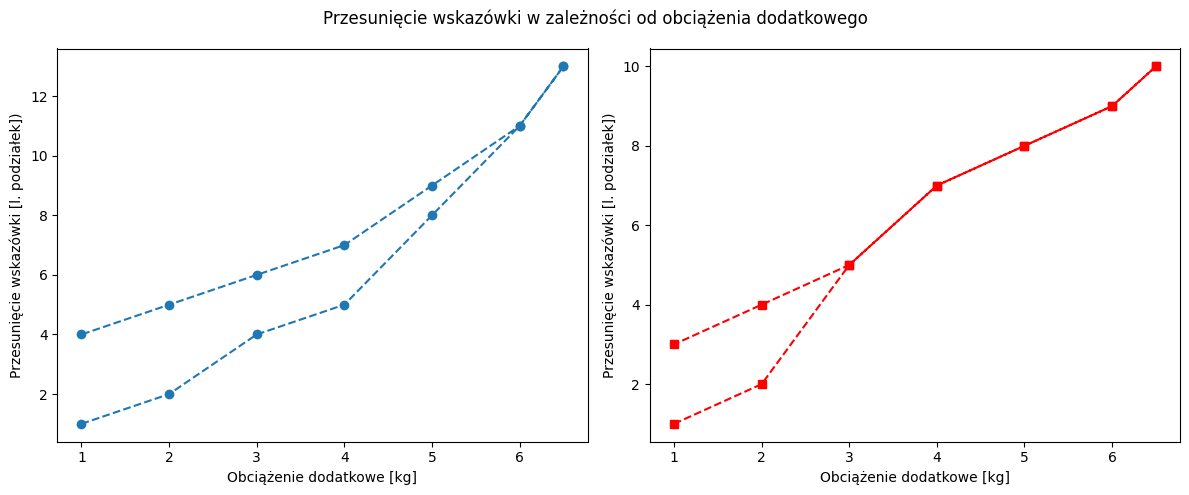

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(wire_weights, wire_len_diff_1, marker="o", linestyle="--")
axes[0].set_xlabel("Obciążenie dodatkowe [kg]")
axes[0].set_ylabel("Przesunięcie wskazówki [l. podziałek])")

axes[1].plot(wire_weights, wire_len_diff_2, marker="s", linestyle="--", color="r")
axes[1].set_xlabel("Obciążenie dodatkowe [kg]")
axes[1].set_ylabel("Przesunięcie wskazówki [l. podziałek])")

fig.suptitle("Przesunięcie wskazówki w zależności od obciążenia dodatkowego")

plt.tight_layout()
plt.show()

## Wykres wszystkich pomiarów z niepewnościami


In [65]:
m = np.array(wire_weights[7:]).reshape(-1, 1)
l_1 = np.array(wire_len_diff_2_mm[7:])
print(len(m))
print(len(wire_len_pred))
print(len(l_1))

7
7
7


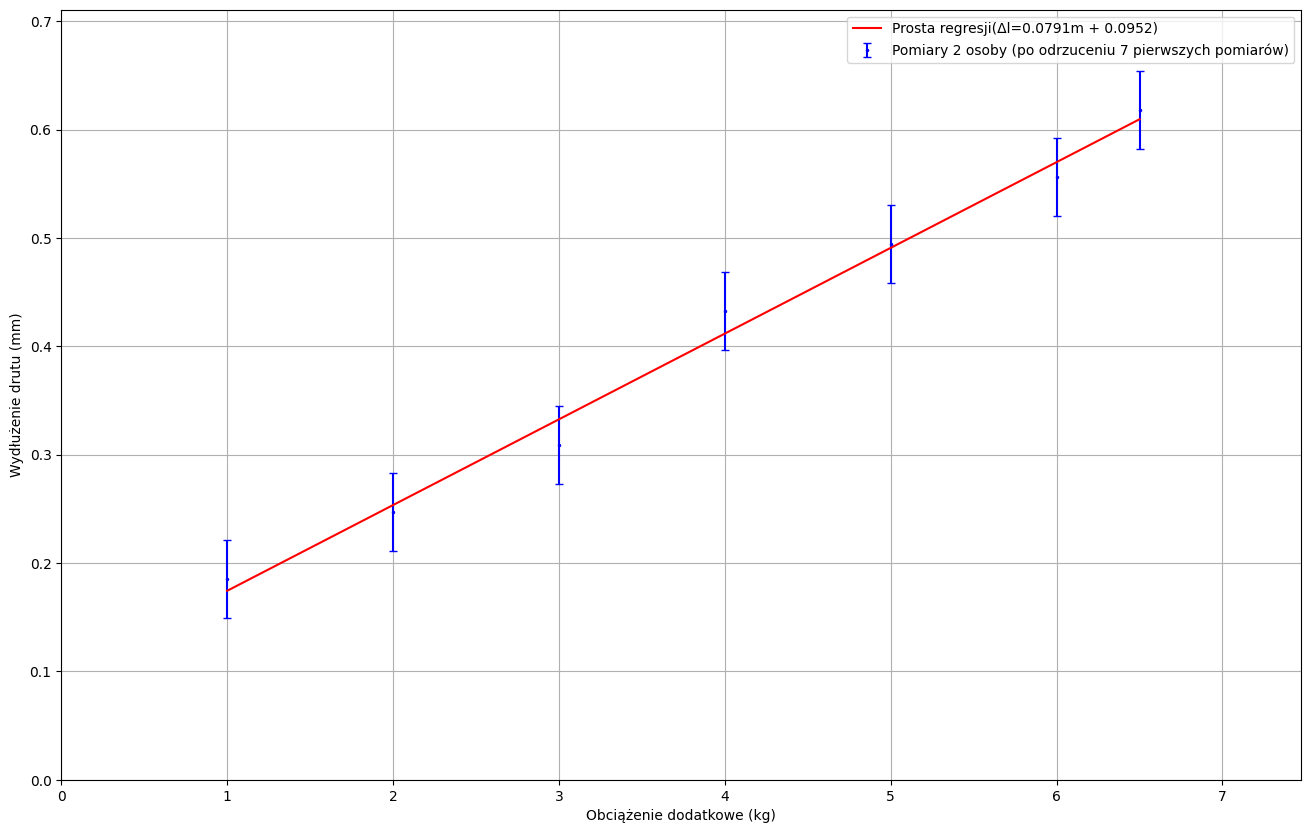

In [73]:
plt.figure(figsize=(16, 10))
plt.errorbar(
    m,
    l_1,
    yerr=u_c_dl_1[7:],
    fmt=".",
    markersize=3,
    label="Pomiary 2 osoby (po odrzuceniu 7 pierwszych pomiarów)",
    color="blue",
    capsize=3,
)
# plt.scatter(m, l_1, label="Pomiary", color="blue")
plt.plot(
    m,
    wire_len_pred,
    label=f"Prosta regresji(Δl={model.coef_[0]:.4f}m + {model.intercept_:.4f})",
    color="red",
)
plt.xlabel("Obciążenie dodatkowe (kg)")

plt.ylabel("Wydłużenie drutu (mm)")
# plt.title(
#     "Prosta regresji liniowej wydłużenia drutu w zależności od obciążenia dodatkowego"
# )
plt.legend()
plt.grid()


plt.xlim(0, 1.15 * np.max(m))
plt.ylim(0, 1.15 * np.max(l_1))

plt.show()

### Wykres regresji z niepewnościami


In [42]:
u_dl = np.array(
    [
        u_c_dl_1,
        u_c_dl_2,
    ]
).flatten()

print(u_dl)

[0.0356831  0.03569164 0.03572581 0.03575141 0.03586214 0.03602337
 0.03615859 0.03615859 0.03602337 0.0359103  0.03581959 0.03578268
 0.03575141 0.03572581 0.0356831  0.03569164 0.03575141 0.03581959
 0.03586214 0.0359103  0.03596406 0.03596406 0.0359103  0.03586214
 0.03581959 0.03575141 0.03572581 0.03570588]


In [46]:
m = np.array(wire_weights).reshape(-1, 1)
l_1 = np.array(wire_len_diff_1_mm)
l_2 = np.array(wire_len_diff_2_mm)
print(len(l_1))
print(len(m))

14
14


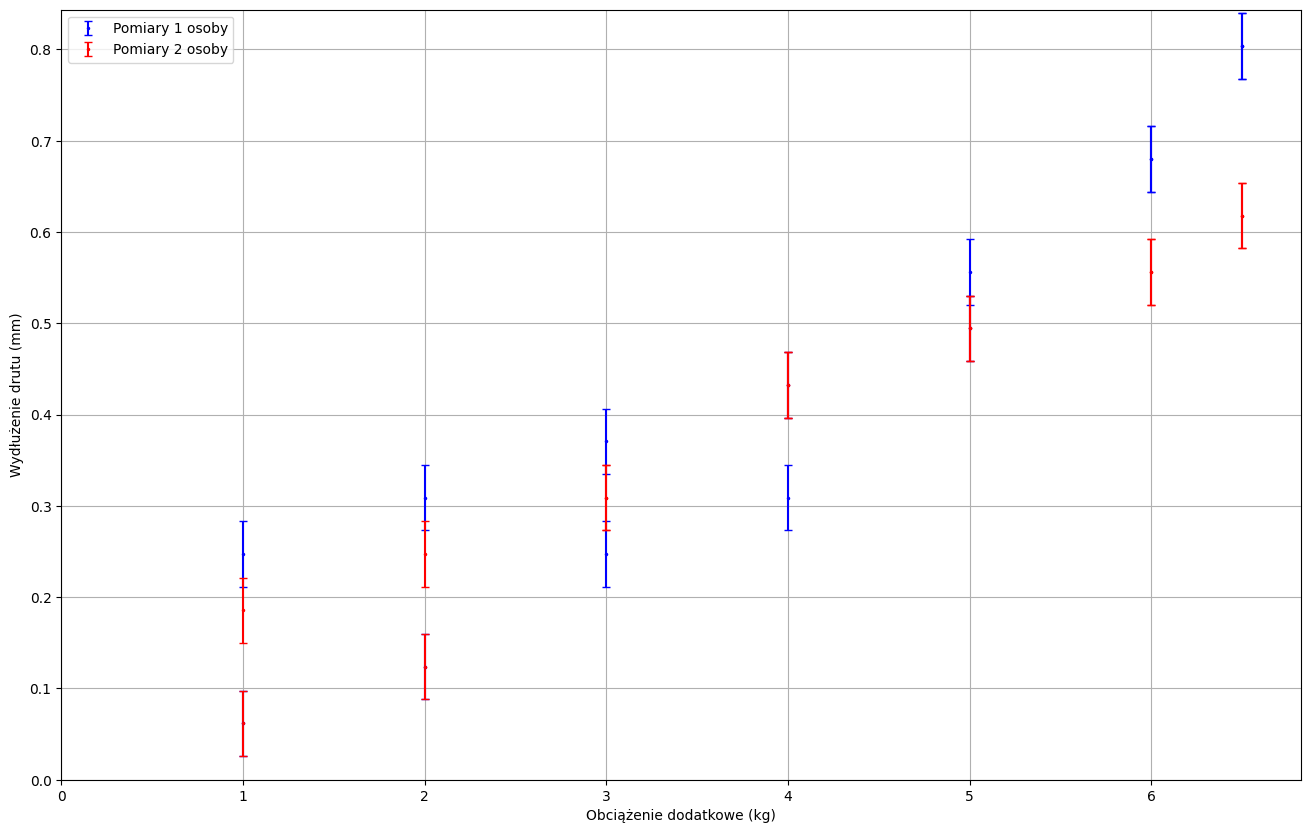

In [48]:
m = np.array(wire_weights).reshape(-1, 1)
l_1 = np.array(wire_len_diff_1_mm)
l_2 = np.array(wire_len_diff_2_mm)

plt.figure(figsize=(16, 10))
plt.errorbar(
    m,
    l_1,
    yerr=u_c_dl_1,
    fmt=".",
    markersize=3,
    label="Pomiary 1 osoby",
    color="blue",
    capsize=3,
)
plt.errorbar(
    m,
    l_2,
    yerr=u_c_dl_2,
    fmt=".",
    markersize=3,
    label="Pomiary 2 osoby",
    color="red",
    capsize=3,
)
# plt.plot(
#     m,
#     wire_len_pred,
#     label=f"Prosta regresji(Δl={model.coef_[0]:.4f}m + {model.intercept_:.4f})",
#     color="red",
# )
plt.xlabel("Obciążenie dodatkowe (kg)")
plt.ylabel("Wydłużenie drutu (mm)")
# plt.title(
#     "Prosta regresji liniowej wydłużenia drutu w zależności od obciążenia dodatkowego"
# )
plt.legend()
plt.grid()


plt.xlim(0, 1.05 * np.max(m))
plt.ylim(0, 1.05 * np.max(l))

plt.show()